## Random Under Sampling Study

Random undersampling consists in extracting at random samples from the majority class, until they reach a certain proportion compared to the minority class, typically 50:50.

- **Criteria for data exclusion**: Random
- **Final Dataset size**: 2 x minority class

In [8]:
# import libraries
import numpy as np
import pandas as pd

# for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn 
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# from imblearn
from imblearn.under_sampling import RandomUnderSampler

## Create Data

- Lets create data where the classes have different degree of separateness

In [27]:
def create_data(sep):
    X, y = make_classification(n_samples=1000, 
                               n_features=2,
                               n_redundant=0,
                               #n_classes=2,
                               n_clusters_per_class=1,
                               weights=[0.99],
                              class_sep=sep,
                              random_state=1)
    # transform arrays into pandas DataFrame and Series
    columns = ['varA', 'varB']
    X = pd.DataFrame(X, columns=columns)
    y = pd.Series(y)
    
    return X,y

In [29]:
X, y = create_data(1)
X.head()

,varA,varB
0,0.869247,1.186136
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529


In [30]:
y.value_counts()/len(y)

0    0.983
1    0.017
dtype: float64

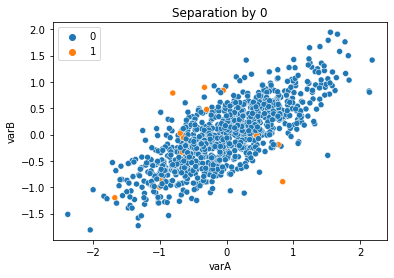

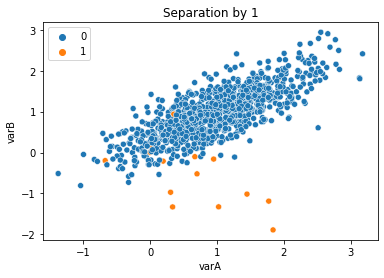

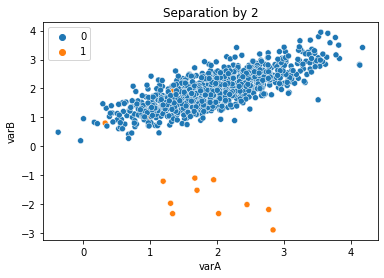

In [31]:
# make data with different class separateness and plot
for i in [0,1,2]:
    X, y = create_data(i)
    
    sns.scatterplot(data = X, x = X['varA'], y = X['varB'], hue = y)
    plt.title('Separation by {}'.format(i))
    plt.show()

- As we increase the sep value, the minority and majority classes show less degree of overlap

## UnderSample data
- Now we will remove the data from majority class untill the number of observations of both the majority and minority classes are the same 

In [32]:
# passing a higher degree of separeteness
X, y = create_data(2)

In [33]:
# original data shape
X.shape, y.shape

((1000, 2), (1000,))

In [34]:
# value counts
y.value_counts()/len(y)

0    0.983
1    0.017
dtype: float64

In [35]:
# create under sampled data

rus = RandomUnderSampler(sampling_strategy='auto', # samples only the majority class
                                            replacement=True,
                                            random_state=0)
    
X_usampled, y_usampled = rus.fit_resample(X,y)
X_usampled.shape, y_usampled.shape

((34, 2), (34,))

In [36]:
# original data value counts
y.value_counts()

0    983
1     17
dtype: int64

In [37]:
# resampled data value counts
y_usampled.value_counts()

0    17
1    17
dtype: int64

<AxesSubplot:xlabel='varA', ylabel='varB'>

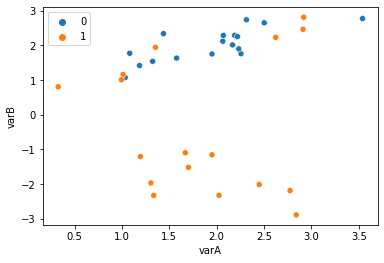

In [38]:
# plot the data

sns.scatterplot(data=X_usampled, x =X_usampled['varA'], y = X_usampled['varB'], hue=y_usampled)

In [45]:
# lets write a function to do the same for different sep values

def check_diff_sep(sep):
    
    X, y = create_data(sep)
    print('Original Data Shape: ')
    print(X.shape, y.shape)
    
    rus = RandomUnderSampler(sampling_strategy='auto', random_state=0, replacement=True)
    
    X_resampled, y_resampled = rus.fit_resample(X,y)
    
    print('Resampled Data Shape: ')
    print(X_resampled.shape, y_resampled.shape)
    print('Original Data Value Counts :\n{}'.format(y.value_counts()))
    print('Resampled Data Value Counts :\n{}'.format(y_resampled.value_counts()))
    
    # plot
    sns.scatterplot(data = X_resampled, x = X_resampled['varA'], y=X_resampled['varB'], hue = y_resampled)  
    

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(34, 2) (34,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    17
1    17
dtype: int64


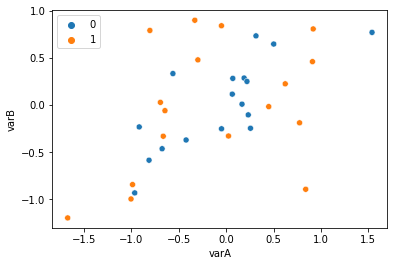

In [46]:
# for sep = 0
check_diff_sep(0)

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(34, 2) (34,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    17
1    17
dtype: int64


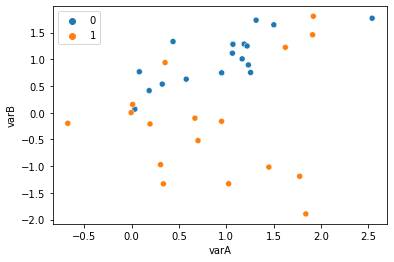

In [47]:
# for sep = 0
check_diff_sep(1)

## Balancing Ratio
- Now, lets resample the data with majority class observations double that of the minority class

In [51]:
# lets write a function to do the same for different sep values

def balance_ratio(sep):
    
    X, y = create_data(sep)
    print('Original Data Shape: ')
    print(X.shape, y.shape)
    
    rus = RandomUnderSampler(sampling_strategy=0.5, # double the observations of majority
                             random_state=0,
                             replacement=True)
    
    X_resampled, y_resampled = rus.fit_resample(X,y)
    
    print('Resampled Data Shape: ')
    print(X_resampled.shape, y_resampled.shape)
    print('Original Data Value Counts :\n{}'.format(y.value_counts()))
    print('Resampled Data Value Counts :\n{}'.format(y_resampled.value_counts()))
    
    # plot
    sns.scatterplot(data = X_resampled, x = X_resampled['varA'], y=X_resampled['varB'], hue = y_resampled)  
    plt.title('For separator value: {}'.format(i))
    plt.show()
    

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(51, 2) (51,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    34
1    17
dtype: int64


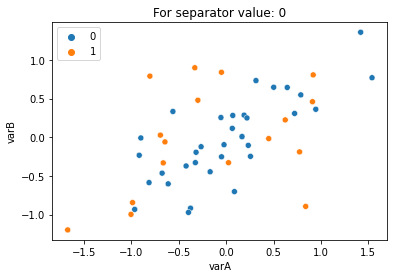

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(51, 2) (51,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    34
1    17
dtype: int64


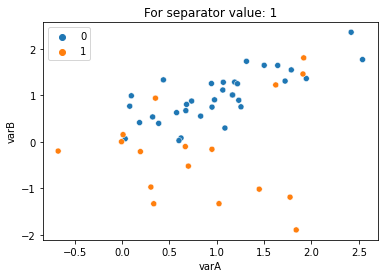

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(51, 2) (51,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    34
1    17
dtype: int64


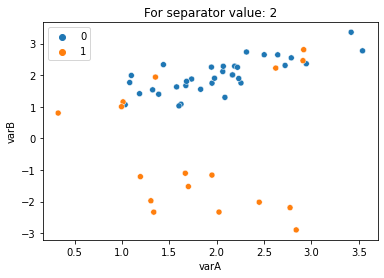

In [52]:
# lets check for different separator values

for i in [0,1,2]:
    balance_ratio(i)

### Custom number of observations
- We can also specify the number of observations that we want from each class

In [53]:
# lets write a function to do the same for different sep values

def custom_ratio(sep):
    
    X, y = create_data(sep)
    print('Original Data Shape: ')
    print(X.shape, y.shape)
    
    rus = RandomUnderSampler(sampling_strategy={0:100, 1:15}, # from 0 class, 100 obs and from 1 class 15 obs
                             random_state=0,
                             replacement=True)
    
    X_resampled, y_resampled = rus.fit_resample(X,y)
    
    print('Resampled Data Shape: ')
    print(X_resampled.shape, y_resampled.shape)
    print('Original Data Value Counts :\n{}'.format(y.value_counts()))
    print('Resampled Data Value Counts :\n{}'.format(y_resampled.value_counts()))
    
    # plot
    sns.scatterplot(data = X_resampled, x = X_resampled['varA'], y=X_resampled['varB'], hue = y_resampled)  
    plt.title('For separator value: {}'.format(i))
    plt.show()
    

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(115, 2) (115,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    100
1     15
dtype: int64


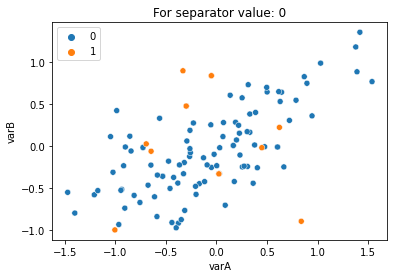

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(115, 2) (115,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    100
1     15
dtype: int64


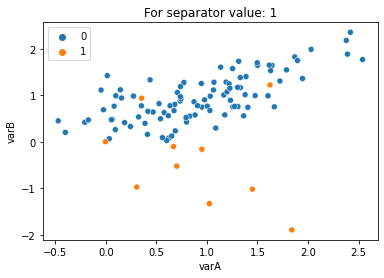

Original Data Shape: 
(1000, 2) (1000,)
Resampled Data Shape: 
(115, 2) (115,)
Original Data Value Counts :
0    983
1     17
dtype: int64
Resampled Data Value Counts :
0    100
1     15
dtype: int64


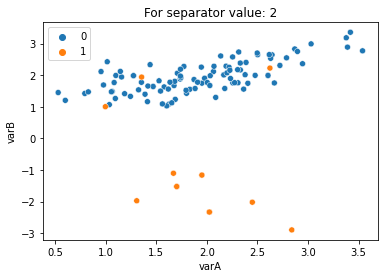

In [54]:
for i in [0,1,2]:
    custom_ratio(i)

In [55]:
## Load data for further analysis

df = pd.read_csv('kdd2004.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [58]:
df.shape

(145751, 75)

In [56]:
df['target'].value_counts()

-1    144455
 1      1296
Name: target, dtype: int64

In [59]:
# check the balance ratio
# highly imbalanced
df['target'].value_counts()/len(df)

-1    0.991108
 1    0.008892
Name: target, dtype: float64

### split the data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                   df['target'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [61]:
# resample the majority class data

rus = RandomUnderSampler(sampling_strategy='auto', # to automatically reduce the majority class obs to the size of the min
                        random_state=0,
                        replacement=True)

X_res, y_res = rus.fit_resample(X_train, y_train)

In [62]:
X_res.shape, y_res.shape

((1782, 74), (1782,))

In [65]:
y_train.value_counts()

-1    101134
 1       891
Name: target, dtype: int64

In [63]:
y_res.value_counts()

-1    891
 1    891
Name: target, dtype: int64

# Plot and compare the between the original and the resampled data

<AxesSubplot:xlabel='0', ylabel='1'>

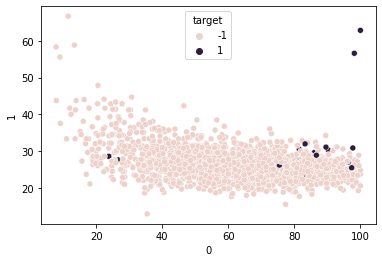

In [66]:
# plotting the original data by taking random 1782 samples
# for columns say 0 and 1

sns.scatterplot(data = df.sample(1782, random_state=0), x = '0', y = '1', hue = 'target')

- Here we can see very less observations from the target class 1
- lets now plot and check for our resampled data for columns 0 and 1
- before that lets prepare our data

In [67]:
data = pd.concat([X_res, y_res], axis = 1)
col_names = [str(i) for i in range(74)] + ['target']

resampled_data = pd.DataFrame(data=data, columns=col_names)
resampled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,47.83,32.73,0.65,41.0,-4.0,808.4,-0.34,1.93,19.5,-66.0,...,369.3,0.95,0.81,3.0,-34.0,-63.8,1.72,0.47,0.60,-1
1,42.48,25.83,-1.58,-52.0,17.5,1878.3,0.57,-0.90,-10.5,-70.5,...,1167.5,0.76,2.41,14.0,-133.0,954.5,0.68,0.41,0.13,-1
2,77.85,25.69,1.43,56.5,10.0,4186.1,-0.69,1.15,29.5,-112.0,...,4344.1,-0.45,2.09,24.0,-131.0,597.8,1.31,0.40,0.83,-1
3,44.13,20.25,-0.59,-57.0,20.0,3357.1,-0.23,0.18,-15.5,-105.0,...,2279.0,1.82,-0.20,-17.0,-146.0,779.9,1.19,0.29,0.49,-1
4,84.08,22.58,0.74,-6.0,-67.5,3247.4,-0.59,1.56,20.0,-154.0,...,2445.8,0.39,1.47,14.0,-155.0,785.7,1.14,0.26,0.96,-1


<AxesSubplot:xlabel='0', ylabel='1'>

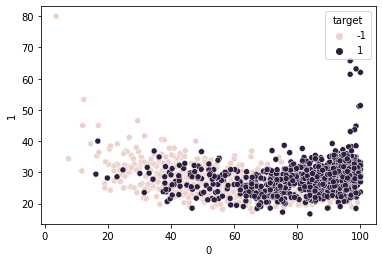

In [68]:
# plot for say columns 0 and 1
sns.scatterplot(data=resampled_data, x='0', y ='1', hue='target')

- Now, we can see more colors of darker purple, as the number of obs are same for both classes

<AxesSubplot:xlabel='9', ylabel='10'>

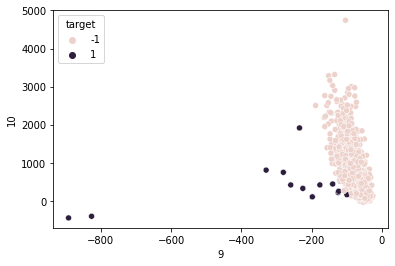

In [69]:
## Lets compare for say another column set say 9 and 10
sns.scatterplot(data = df.sample(1782, random_state=0), x ='9', y = '10', hue = 'target')

<AxesSubplot:xlabel='9', ylabel='10'>

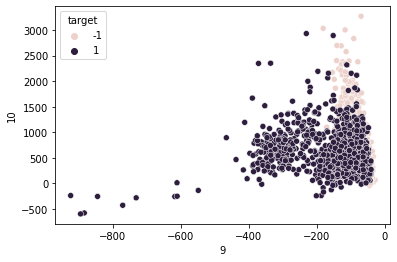

In [70]:
## Lets compare for say another column set say 9 and 10
sns.scatterplot(data = resampled_data, x ='9', y = '10', hue = 'target')

## model performance comparison

In [83]:
# lets create a function to develop a random forest model

def dev_rf(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=39)
    rf.fit(X_train, y_train)
    
    # get metrics
    rf_probs_train = rf.predict_proba(X_train)[:,1]
    roc_train = roc_auc_score(y_train, rf_probs_train)
    print('ROC AUC score for train data: {}'.format(roc_train))
    rf_probs_test = rf.predict_proba(X_test)[:,1]
    roc_test = roc_auc_score(y_test, rf_probs_test)
    print('ROC AUC score for test data: {}'.format(roc_test))

In [84]:
# for the original data
dev_rf(X_train, X_test, y_train, y_test)

ROC AUC score for train data: 0.9736769545142595
ROC AUC score for test data: 0.9724711107235364


In [85]:
# for the resampled data
dev_rf(X_res, X_test, y_res, y_test)

ROC AUC score for train data: 0.9937622893103626
ROC AUC score for test data: 0.9876831611048272


- We can see a better performance when resampled than the original data

## Under-sampling without replacement

In [87]:
# under sampling without replacement
rus_without_replacement = RandomUnderSampler(sampling_strategy='auto',
                         random_state=0,
                         replacement=False) # without replacement
X_res_1, y_res_1 = rus_without_replacement.fit_resample(X_train, y_train)

In [88]:
X_res_1.shape, y_res_1.shape

((1782, 74), (1782,))

In [89]:
y_res_1.value_counts()

-1    891
 1    891
Name: target, dtype: int64

In [90]:
# now lets called the random forest model and see its performance
dev_rf(X_res_1, X_test, y_res_1, y_test)

ROC AUC score for train data: 0.9943190478169902
ROC AUC score for test data: 0.9884270195420292


- Can see a similar performance with the earlier model which was tested with replacement =True
- Also, this is again performing better than the original dataset

## Logistic Model 

In [91]:
from sklearn.linear_model import LogisticRegression

In [94]:
def log_model(X_train, X_test, y_train, y_test):
    
    log = LogisticRegression(max_iter=1000, random_state=39, n_jobs=2, solver='saga')
    
    log.fit(X_train, y_train)
    
    probs_train = log.predict_proba(X_train)
    probs_test = log.predict_proba(X_test)
    
    # metrics
    print('ROC auc score train data: {}'.format(roc_auc_score(y_train, probs_train[:,1])))
    print('ROC auc score test data: {}'.format(roc_auc_score(y_test, probs_test[:,1])))

In [95]:
# for the original data
log_model(X_train, X_test, y_train, y_test)

ROC auc score train data: 0.9128403544656569
ROC auc score test data: 0.9154182629187053


C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [96]:
# for the resampled data
log_model(X_res, X_test, y_res, y_test)

ROC auc score train data: 0.9366643111499078
ROC auc score test data: 0.9404972526368618


C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


- So, for the same model of Logistic Regression also, we can see that the model performs much better when the data are resampled than the original data